# Rossmann Drug Store Sales

In [12]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
s

In [13]:
# importing train data to learn
train = pd.read_csv("./train.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')

# additional store data
store = pd.read_csv("./store.csv", 
                    low_memory = False)
# time series as indexes
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

# Exploratory Data Analysis

First, we go through the dataset to understand what we have.
  - In "Open" column, we have 0 and 1. 0 stand for the store is close, and 1 stand for open.
  - In "Promo" column, we also have 0 and 1. 1 still stand for having promotion, 0 is not.
  - .......
    

In [14]:
print("In Total:", train.shape)
train.head(5)

In Total: (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [15]:
train[train['Customers']==0].head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1
2015-07-31,876,5,0,0,0,1,0,1
2015-07-30,292,4,0,0,0,1,0,1
2015-07-30,876,4,0,0,0,1,0,1
2015-07-29,292,3,0,0,0,1,0,1


In [16]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

train['SalePerCustomer'] = train['Sales']/ train['Customers']
train.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118


In [6]:
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [23]:
train.groupby('Store')['SalePerCustomer'].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
1,781.0,8.393038,0.689619,6.513228,7.903475,8.362376,8.891304,10.536503
2,784.0,8.408443,0.994872,3.869416,7.716940,8.313092,9.014858,11.890588
3,779.0,9.117599,1.091865,6.840056,8.195019,9.123440,9.954838,13.150880
4,784.0,7.249827,0.504537,6.003643,6.857851,7.215175,7.570805,9.342457
5,779.0,8.611229,1.003729,6.444840,7.834218,8.584677,9.245045,12.078512
6,780.0,8.634089,0.696449,6.801382,8.090661,8.640966,9.100789,11.024533
7,786.0,9.232635,0.891402,6.942529,8.590996,9.121255,9.758517,12.357718
8,784.0,8.290323,0.961987,5.943299,7.522979,8.183258,9.010986,11.339690
9,779.0,11.206413,0.937832,9.022989,10.501859,11.136029,11.821494,15.308153


At the first sight, on average the customer spend 9.49$ per day

# Dealing with missing values

- We use ECDF (Empirical Cumulative Distribution Function) to know how many percent of the value less than "a" in dataset.

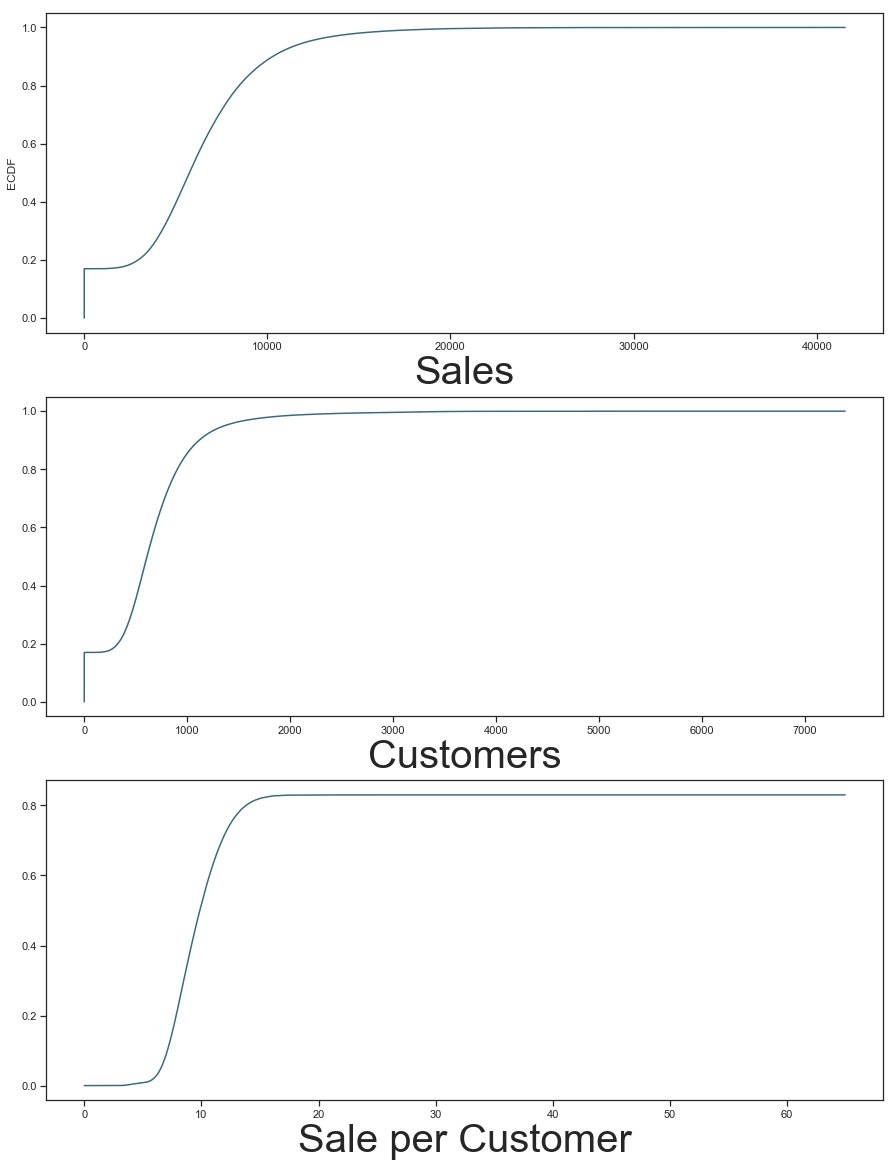

In [7]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (15, 20))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales', fontsize = 40); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers', fontsize=40);

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer', fontsize = 40);

- The Sales Chart, we have nearly 20% of sale is 0. 
- And that case, it is not vlaue for predicting. So, we need to remove or replace it. 
- when sales is 0, we have 2 case. first is the store was closed or open but they can not sold anything.

In [8]:
# sales equal 0
Total_Sales_0 = train[train['Sales']==0]
Sales_0_Open = train[(train['Sales']==0) & (train['Open']!=0)]
Sales_0_Close = train[(train['Sales']==0) & (train['Open']==0)]
print('Total Sales 0:', Total_Sales_0.shape[0])
print("\n")
print("Case Sale was 0 and store was Open", Sales_0_Open.shape[0])
print("\n")
print("Case Sale was 0 and store was Close ", Sales_0_Close.shape[0])

Total Sales 0: 172871


Case Sale was 0 and store was Open 54


Case Sale was 0 and store was Close  172817


We just have 54 case in total 844340, so we can remove it but it not effect to dataset

In [11]:
train = train[(train['Open']!=0) & (train['Sales']!=0)]
print("After remove, we have dataset in total is:", train.shape)

After remove, we have dataset in total is: (844338, 13)


Em xin lỗi vì chưa hoàn thành bài tập. Tuần này em bận một số việc gia đình, ngày thứ 2 em sẽ hoàn thành và nộp bổ sung.